# Image segmentation with scivision

In this notebook, we use scivision to load several image segmentation models from [Hugging Face](https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads) and run them on compatible datasource from the scivision catalog.

The hugging face models are loaded via the hugging face segmentation plugin for scivision, which is a model entry in the scivision catalog. Click the [link to the plugin repo](https://github.com/alan-turing-institute/scivision_huggingface_segmentation) to find out which models it can be used to load. 

In [1]:
from scivision import default_catalog, load_pretrained_model, load_dataset

In [2]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
model_repo = models_catalog[models_catalog.name == "huggingface-segmentation"].url.item()
model_repo # Why not paste the repo link into your browser and see how it looks?

FlexibleUrl('https://github.com/alan-turing-institute/scivision_huggingface_segmentation', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/scivision_huggingface_segmentation')

Note: the "model_selection" arg is not mandatory and will have a default value for any model catalog entries that have more than one model - for model catalog entries with a single model, this need not be set:

In [3]:
# Note: when loading this model repo for the first time you'll need to add the allow_install=True flag
facebook_model = load_pretrained_model(model_repo, model_selection='facebook_detr_resnet_50_panoptic', allow_install=True)
nvidia_model = load_pretrained_model(model_repo, model_selection='nvidia_segformer_b5_finetuned_ade_640_640')
microsoft_model = load_pretrained_model(model_repo, model_selection='microsoft_beit_large_finetuned_ade_640_640')

/Users/ifenton/opt/anaconda3/envs/scivision_comp/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/ifenton/opt/anaconda3/envs/scivision_comp/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <E43DB505-2225-3701-B0B2-E08388E6ACA0> /Users/ifenton/opt/anaconda3/envs/scivision_comp/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <6DD49776-E35C-397D-832B-3A3AB2A086FB> /Users/ifenton/opt/anaconda3/envs/scivision_comp/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/Users/ifenton/opt/anaconda3/envs/scivision_comp/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be require

In [4]:
compatible_datasources = default_catalog.compatible_datasources("huggingface-segmentation").to_dataframe()
compatible_datasources

,name,description,tasks,labels_provided,domains,url,format,institution,tags
0,stardist-cell-nuclei-2D,Cell microscopy test dataset for detection and...,"(TaskEnum.segmentation, TaskEnum.object_detect...",True,"(optical-microscopy,)",https://github.com/stardist/stardist/releases/...,image,"(epfl,)","(help-needed, 3D, cell, cell-counting, biology..."
1,oppd-seedlings,The Open Plant Phenotyping Database [OPPD] is ...,"(TaskEnum.segmentation, TaskEnum.thresholding,...",True,"(multispectral, hyperspectral)",https://github.com/alan-turing-institute/oppd-...,image,"(Aarhus University,)","(help-needed, 2D, plant-phenotyping, agricultu..."
2,scivision-test-data,Test data comprised of individual images inclu...,"(TaskEnum.segmentation, TaskEnum.object_detect...",True,"(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,"(Wikipedia by Erik Veland,)","(demo,)"
4,coastal-edges,Sample dataset of satellite RGB imagery over t...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."
5,treecrowns,Sample dataset of drone RGB imagery over Sepil...,"(TaskEnum.segmentation, TaskEnum.object_detect...",False,"(computer-vision, earth-observation, ecology)",https://github.com/shmh40/detectreeRGB-treecro...,image,"(Cambridge University,)","(2D, drone, satellite, aerial, remote-sensing,..."
6,sentinel2_stac,Data plugin for accessing Sentinel-2 Cloud-Opt...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/alan-turing-institute/scivi...,image,"(The Alan Turing Institute,)","(satellite, aerial, remote-sensing, ecology, e..."
9,Parakeet,Synthetic cryoEM data from Parakeet,"(TaskEnum.segmentation, TaskEnum.thresholding,...",False,None,https://github.com/rosalindfranklininstitute/s...,image,"(Rosalind Franklin Institute,)","(CryoEM,)"


In [5]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'coastal-edges']
target_datasource

,name,description,tasks,labels_provided,domains,url,format,institution,tags
4,coastal-edges,Sample dataset of satellite RGB imagery over t...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."


In [6]:
target_datasource.url.item()

FlexibleUrl('https://github.com/MartinSJRogers/VEdge_Detector_scivision', scheme='https', host='github.com', tld='com', host_type='domain', path='/MartinSJRogers/VEdge_Detector_scivision')

In [7]:
cat = load_dataset(target_datasource.url.item()) 
print(list(cat))

['sample_image']


In [8]:
sample_image = cat.sample_image(sample_image='winterton').to_dask()

/Users/ifenton/opt/anaconda3/envs/scivision_comp/lib/python3.9/site-packages/xarray/core/dataarray.py:1323: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [9]:
import matplotlib.pyplot as plt

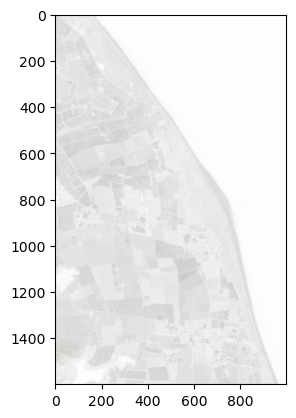

In [10]:
plt.imshow(sample_image)

In [11]:
fb_outputs = facebook_model.predict(sample_image)

In [12]:
nv_outputs = nvidia_model.predict(sample_image)

In [13]:
ms_outputs = microsoft_model.predict(sample_image)

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


In [14]:
fb_outputs

DetrSegmentationOutput(loss=None, loss_dict=None, logits=tensor([[[-16.1586,  -3.3672,  -4.1644,  ..., -17.0871, -15.6756,  12.8223],
         [-16.5063,  -1.8943,  -6.6391,  ..., -16.9658, -15.8934,  13.2566],
         [-17.0935,  -1.6594,  -7.9489,  ..., -17.1152, -16.2002,  12.4349],
         ...,
         [-15.8920,  -2.7268,  -6.5317,  ..., -16.1740, -14.9697,  12.4627],
         [-16.5666,  -2.2675,  -7.3229,  ..., -16.3659, -15.4280,  12.2402],
         [-16.6542,  -2.9925,  -5.3223,  ..., -17.5232, -16.2469,  13.1812]]],
       grad_fn=<ViewBackward0>), pred_boxes=tensor([[[0.5000, 0.3925, 0.9974, 0.7769],
         [0.4654, 0.5027, 0.2165, 0.5497],
         [0.7013, 0.9085, 0.1227, 0.1148],
         [0.5000, 0.4100, 0.9973, 0.8204],
         [0.8001, 0.7535, 0.0770, 0.0693],
         [0.0245, 0.1087, 0.0473, 0.0857],
         [0.5854, 0.8916, 0.2023, 0.1959],
         [0.2507, 0.7114, 0.1230, 0.1409],
         [0.0273, 0.8412, 0.0518, 0.1652],
         [0.1532, 0.7404, 0.0795, 

In [15]:
nv_outputs

SemanticSegmenterOutput(loss=None, logits=tensor([[[[-10.5480, -12.6221, -12.7323,  ...,  -6.2110,  -5.9306,  -5.3099],
          [-12.7082, -13.7930, -13.7730,  ...,  -6.6113,  -6.2922,  -5.6243],
          [-12.4942, -13.5425, -12.6227,  ...,  -6.8111,  -6.5341,  -5.9109],
          ...,
          [ -8.0755,  -8.8012,  -9.0969,  ..., -10.0277,  -9.9224, -10.0207],
          [ -8.4627,  -8.9018,  -8.9743,  ..., -10.3473, -10.4664, -10.3558],
          [ -7.6262,  -9.2911,  -9.3678,  ..., -10.3708, -10.4827,  -9.9815]],

         [[ -9.1810, -10.9643, -11.3175,  ...,  -6.8570,  -6.5764,  -6.0727],
          [-11.1475, -11.9616, -12.0755,  ...,  -7.2152,  -6.9135,  -6.3537],
          [-11.0738, -11.9337, -11.2875,  ...,  -7.6201,  -7.2944,  -6.6199],
          ...,
          [ -5.9197,  -6.5525,  -6.9618,  ...,  -7.1044,  -7.2109,  -7.2809],
          [ -6.0980,  -6.4213,  -6.7127,  ...,  -7.3047,  -7.5594,  -7.4512],
          [ -5.1734,  -6.7127,  -7.1109,  ...,  -7.2178,  -7.5356,  

In [16]:
ms_outputs

SemanticSegmenterOutput(loss=None, logits=tensor([[[[ -3.6521,  -1.3131,  -2.1426,  ...,  -2.0119,  -1.1952,  -3.4079],
          [ -1.9077,  -0.5096,  -1.1798,  ...,  -1.1478,  -0.3056,  -1.7560],
          [ -2.6581,  -1.2200,  -2.2376,  ...,  -2.0488,  -0.8618,  -2.4059],
          ...,
          [ -1.7008,  -0.0982,  -0.7208,  ...,  -1.0134,  -0.0625,  -1.3286],
          [ -1.3140,   0.3414,  -0.2406,  ...,  -0.5123,   0.2421,  -1.0596],
          [ -3.6965,  -1.5699,  -1.9384,  ...,  -2.3739,  -1.5314,  -3.5456]],

         [[ -4.8837,  -2.2391,  -2.5257,  ...,  -2.6901,  -1.9624,  -4.3119],
          [ -2.4982,  -0.6213,  -1.0303,  ...,  -0.9772,  -0.5147,  -2.3991],
          [ -3.1403,  -1.4019,  -1.7880,  ...,  -1.9181,  -1.0317,  -2.9218],
          ...,
          [ -2.5165,  -0.9667,  -1.3961,  ...,  -1.4021,  -1.0628,  -2.7311],
          [ -2.1753,  -0.6804,  -0.9297,  ...,  -1.0812,  -0.6380,  -2.3422],
          [ -4.6470,  -2.4069,  -2.7500,  ...,  -2.8537,  -2.3330,  